### Access libraries that will be used

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [12]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv('P:\MicrosoftOfficeDocuments\MagicSeason2018_2019.csv')
magic.head()

FirstName LastName     Age  Pos        Date   Tm  H/A  Opp W/L  GmSc  ...  \
0    Nikola  Vucevic  28-065    C  12/28/2018  ORL  NaN  TOR   W  36.3  ...   
1    Nikola  Vucevic  27-361    C  10/20/2018  ORL    @  PHI   L  33.6  ...   
2    Nikola  Vucevic  28-032    C  11/25/2018  ORL    @  LAL   W  31.5  ...   
3    Nikola  Vucevic  28-130    C    3/3/2019  ORL    @  CLE   L  30.9  ...   
4  Terrence     Ross  28-064  F-G   4/10/2019  ORL    @  CHO   W  30.1  ...   

   ORB   DRB   TRB   AST  STL  BLK  TOV   PF   PTS   BPM  
0  4.0  15.0  19.0   8.0  2.0  1.0  1.0  1.0  30.0  27.3  
1  4.0   9.0  13.0  12.0  2.0  0.0  2.0  2.0  27.0  22.3  
2  2.0  13.0  15.0   7.0  2.0  3.0  3.0  2.0  31.0  19.0  
3  3.0  10.0  13.0   6.0  2.0  2.0  3.0  2.0  28.0  19.8  
4  2.0   4.0   6.0   2.0  1.0  0.0  1.0  1.0  35.0  19.3  

[5 rows x 34 columns]

In [13]:
magic.tail()

FirstName  LastName     Age  Pos        Date   Tm  H/A  Opp  W/L  GmSc  \
857  Terrence      Ross  27-319  F-G  12/21/2018  ORL    @  CHI    L  -5.2   
858  Terrence      Ross  28-021  F-G   2/26/2019  ORL    @  NYK    L  -6.2   
859  Terrence      Ross  28-026  F-G    3/3/2019  ORL    @  CLE    L  -6.5   
860      Evan  Fournier  26-072  G-F    1/9/2019  ORL    @  UTA    L  -6.6   
861       NaN       NaN     NaN  NaN         NaN  NaN  NaN  NaN  NaN   NaN   

     ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PTS   BPM  
857  ...  0.0  3.0  3.0  0.0  0.0  0.0  0.0  2.0  2.0 -20.0  
858  ...  0.0  2.0  2.0  0.0  0.0  0.0  2.0  3.0  3.0 -27.4  
859  ...  0.0  3.0  3.0  2.0  0.0  0.0  2.0  2.0  2.0 -23.3  
860  ...  0.0  0.0  0.0  0.0  1.0  0.0  1.0  4.0  1.0 -17.4  
861  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 34 columns]

### Display data using histogram, swarmplot, and boxplot

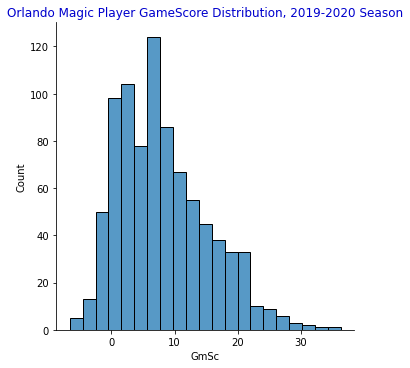

In [14]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2019-2020 Season", color='mediumblue')
plt.show()

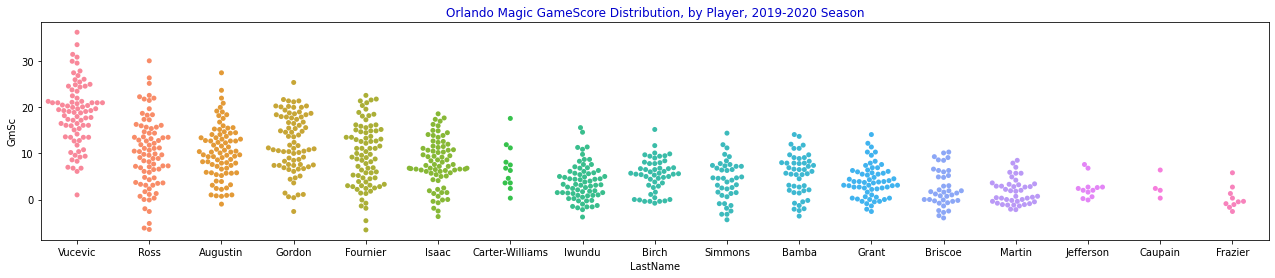

In [17]:
fig, ax = plt.subplots(figsize=(22,4))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2019-2020 Season", color='mediumblue')
plt.show()

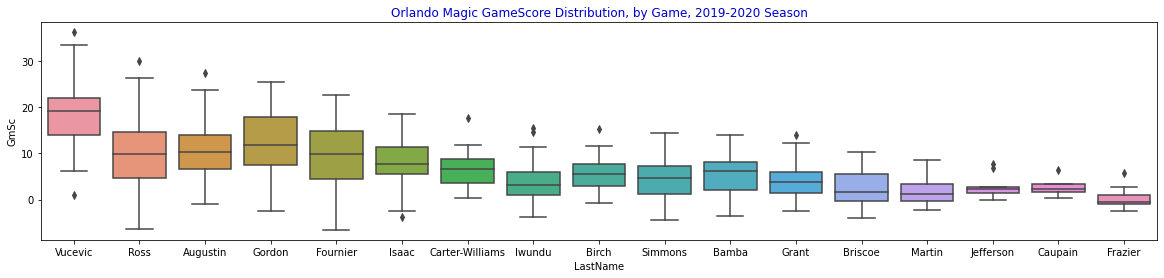

In [19]:
fig, ax = plt.subplots(figsize=(20,4))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2019-2020 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


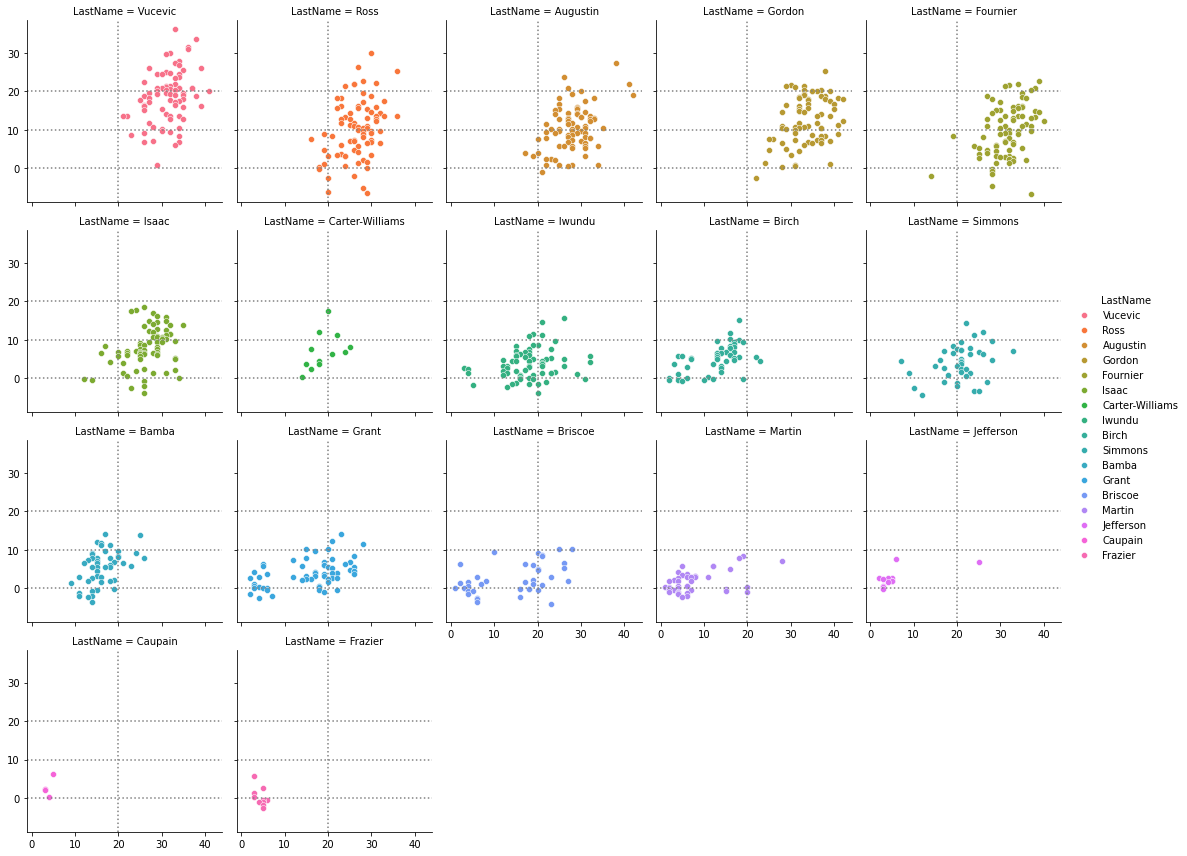

In [20]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.map(plt.axhline, y=10, ls=":", c=".5")
grid.map(plt.axhline, y=20, ls=":", c=".5")
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.axvline, x=20, ls=":", c=".5")
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

c:\software\wpy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


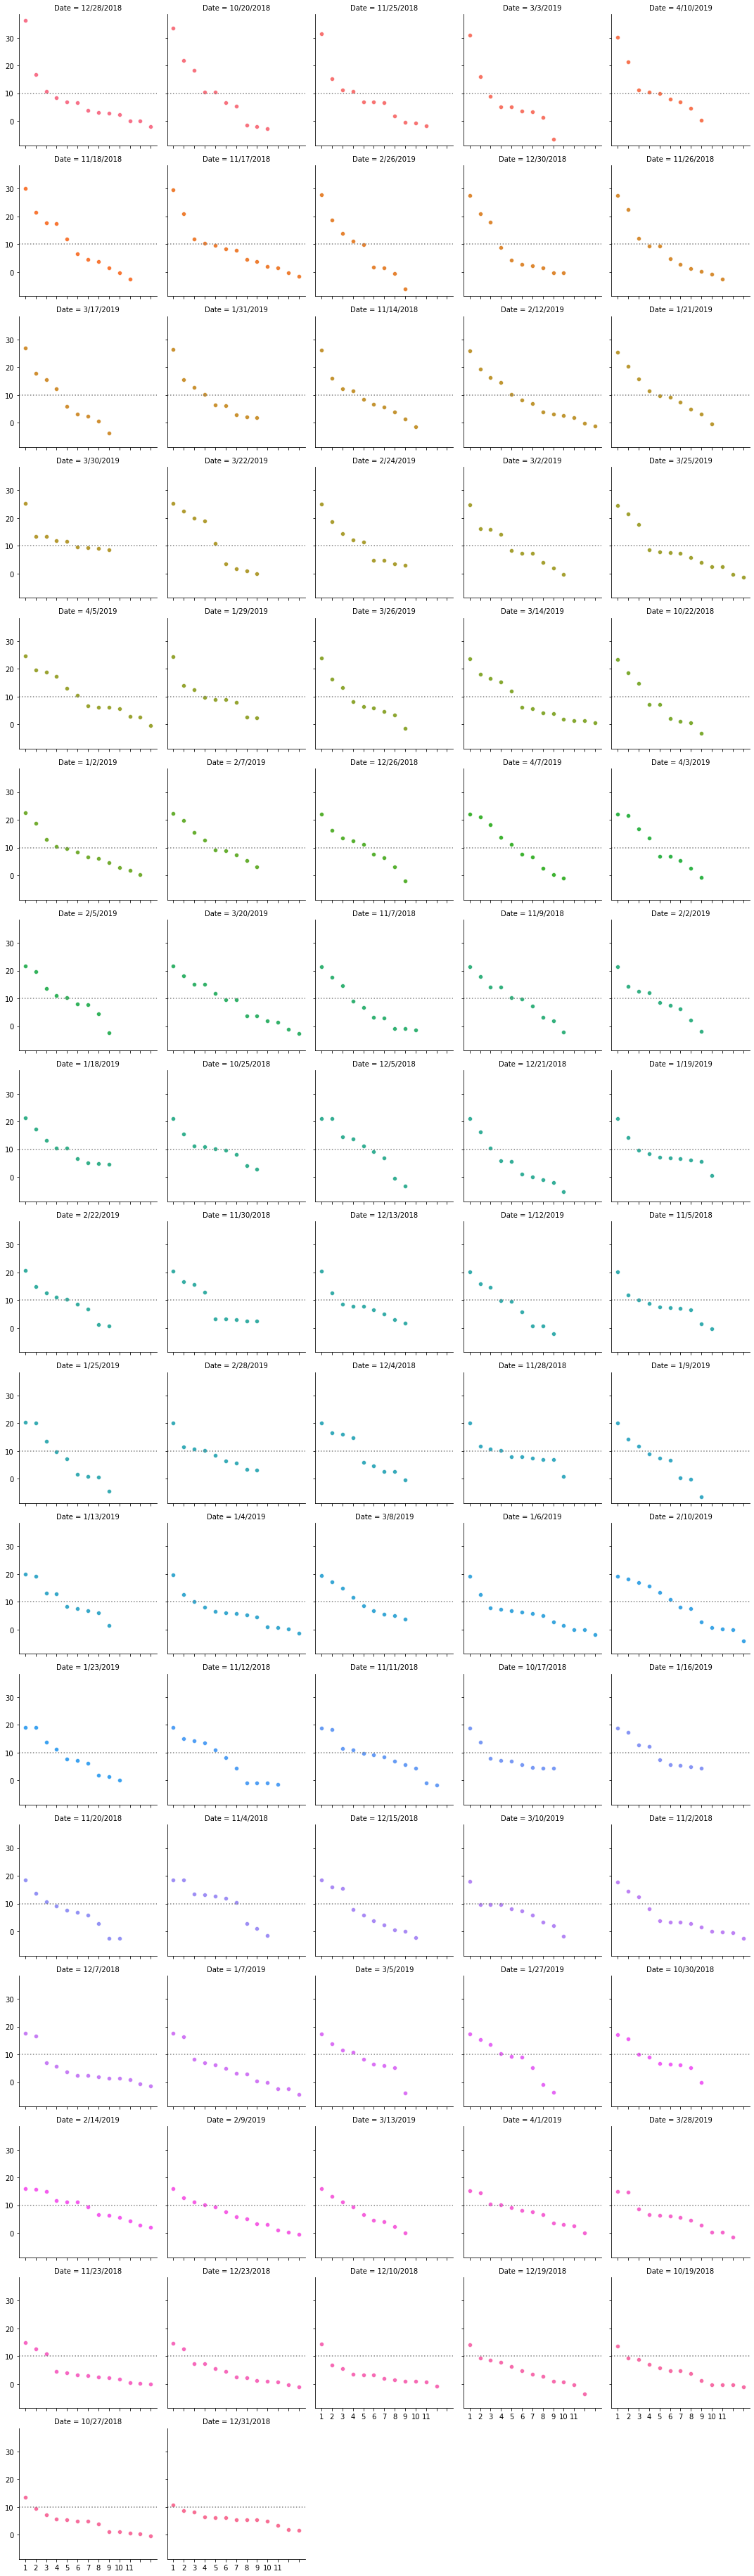

In [21]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [22]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                       
                count       mean       std  min     25%    50%     75%   max
LastName                                                                    
Augustin         81.0  10.449383  5.790145 -1.0   6.600  10.30  14.100  27.5
Bamba            47.0   5.427660  4.467209 -3.6   2.050   6.10   8.150  14.1
Birch            50.0   5.308000  3.640579 -0.8   2.950   5.55   7.800  15.2
Briscoe          39.0   2.489744  3.994720 -4.0  -0.250   1.60   5.600  10.3
Carter-Williams  12.0   6.991667  4.776164  0.3   3.600   6.55   8.875  17.6
Caupain           4.0   2.775000  2.582473  0.3   1.575   2.20   3.400   6.4
Fournier         81.0   9.706173  6.723714 -6.6   4.500   9.80  14.900  22.6
Frazier          10.0   0.290000  2.448333 -2.6  -1.050  -0.45   1.050   5.8
Gordon           78.0  12.385897  6.239333 -2.6   7.525  11.75  17.900  25.4
Grant            60.0   3.990000  3.610798 -2.6   1.450   3.75   6.025  14.1
Isaac            75.0   8.018667  5.144104 -3.7   5.550   7.60  11.400  18.6
Iwundu           68.0   3.766176  3.960462 -3.8   0.975   3.25   5.875  15.6
Jefferson        12.0   2.591667  2.363918 -0.1   1.350   2.20   2.700   7.6
Martin           42.0   1.778571  2.765249 -2.2  -0.400   1.25   3.275   8.5
Ross             81.0  10.085185  7.590308 -6.5   4.700   9.90  14.700  30.1
Simmons          41.0   4.104878  4.408909 -4.4   1.300   4.60   7.200  14.4
Vucevic          80.0  18.655000  6.821687  1.0  14.050  19.20  22.125  36.3

In [23]:
print ("\033[1m"+(colored("Sum of GameScores, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName']].groupby(['LastName'], as_index=True).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Sum of GameScores, by Player
                   GmSc
LastName               
Vucevic          1492.4
Gordon            966.1
Augustin          846.4
Ross              816.9
Fournier          786.2
Isaac             601.4
Birch             265.4
Iwundu            256.1
Bamba             255.1
Grant             239.4
Simmons           168.3
Briscoe            97.1
Carter-Williams    83.9
Martin             74.7
Jefferson          31.1
Caupain            11.1
Frazier             2.9


In [24]:
magic.describe()

GmSc          GS          MP          FG         FGA         FG%  \
count  861.000000  861.000000  861.000000  861.000000  861.000000  836.000000   
mean     8.123693    0.476190   22.975610    3.851336    8.486643    0.440665   
std      7.153665    0.499723    9.708093    3.035252    5.533733    0.231685   
min     -6.600000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.700000    0.000000   17.000000    1.000000    4.000000    0.333000   
50%      6.900000    0.000000   25.000000    3.000000    8.000000    0.455000   
75%     12.700000    1.000000   31.000000    6.000000   13.000000    0.571000   
max     36.300000    1.000000   42.000000   15.000000   24.000000    1.000000   

               2P         2PA        2P%          3P  ...         ORB  \
count  861.000000  861.000000  804.00000  861.000000  ...  861.000000   
mean     2.763066    5.428571    0.48629    1.088269  ...    0.954704   
std      2.529286    4.157489    0.27444    1.303525  ...    1.254403   
min      0.000000    0.000000    0.00000    0.000000  ...    0.000000   
25%      1.000000    2.000000    0.33300    0.000000  ...    0.000000   
50%      2.000000    4.000000    0.50000    1.000000  ...    0.000000   
75%      4.000000    8.000000    0.66700    2.000000  ...    2.000000   
max     13.000000   22.000000    1.00000    8.000000  ...    8.000000   

              DRB         TRB         AST         STL         BLK         TOV  \
count  861.000000  861.000000  861.000000  861.000000  861.000000  861.000000   
mean     3.370499    4.325203    2.433217    0.630662    0.516841    1.203252   
std      2.985782    3.766891    2.304043    0.821620    0.876705    1.185882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    2.000000    1.000000    0.000000    0.000000    0.000000   
50%      3.000000    3.000000    2.000000    0.000000    0.000000    1.000000   
75%      5.000000    6.000000    4.000000    1.000000    1.000000    2.000000   
max     20.000000   24.000000   13.000000    4.000000    5.000000    8.000000   

               PF         PTS         BPM  
count  861.000000  861.000000  861.000000  
mean     1.772358   10.220674   -0.616609  
std      1.407365    7.685843   11.288449  
min      0.000000    0.000000  -44.700000  
25%      1.000000    4.000000   -6.500000  
50%      2.000000    9.000000   -0.800000  
75%      3.000000   15.000000    5.300000  
max      6.000000   36.000000  106.500000  

[8 rows x 25 columns]